<a href="https://colab.research.google.com/github/leon-czarlinski/IowaLiquorSales/blob/main/BigQuery_IowaSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'big-dataite-5324-0gb' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=big-dataite-5324-0gb:US:bquxjob_3c79c043_18a8ccf865b)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_3e6989bc_18a902ab07d') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
  *
FROM
  `bigquery-public-data.iowa_liquor_sales.sales`
WHERE
  date >= '2020-01-01' AND date <= '2020-12-31' AND sale_dollars > 0


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_3e6989bc_18a902ab07d') # Job ID inserted based on the query results selected to explore
sales_df = job.to_dataframe()
sales_df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-32186700040,2020-11-24,5419,CASEY'S GENERAL STORE # 3604/HINTON,121 N FLOYD AVE,HINTON,51024.0,POINT(-96.291721 42.627552),75,PLYMOUTH,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.00
1,INV-25987300041,2020-03-18,5080,C'S LIQUOR STORE,719 2ND AVE W,SPENCER,51301.0,POINT(-95.147741 43.14521),21,CLAY,...,11936,CANADIAN LTD WHISKY PET,12,750,4.34,6.51,24,156.24,18.00,4.75
2,INV-27548900001,2020-05-28,5135,FAREWAY STORES #155 / HUXLEY,911 HWY 69,HUXLEY,50124.0,None,85,STORY,...,34422,GREY GOOSE,6,1000,22.75,34.13,18,614.34,18.00,4.75
3,INV-32456000003,2020-12-04,6068,STAR CONVENIENCE / FORT DODGE,115 N 22ND ST,FORT DODGE,50501.0,POINT(-94.168007 42.507885),94,WEBSTER,...,36304,HAWKEYE VODKA,24,375,1.86,2.79,48,133.92,18.00,4.75
4,INV-26356300038,2020-04-07,2637,HY-VEE #5 / DAVENPORT,2351 W LOCUST,DAVENPORT,52804.0,POINT(-90.611972 41.538207),82,SCOTT,...,36886,MCCORMICK 80PRF VODKA,12,750,3.31,4.97,24,119.28,18.00,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614360,INV-24863100078,2020-01-28,2643,HY-VEE WINE AND SPIRITS / WATERLOO,2126 KIMBALL AVE,WATERLOO,50701.0,None,7,BLACK HAWK,...,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,2,22.48,1.50,0.39
2614361,INV-27418100042,2020-05-21,5906,POLK CITY LIQUOR,201 N 3RD ST STE A AND B,POLK CITY,50226.0,None,77,POLK,...,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,2,22.48,1.50,0.39
2614362,INV-27350200064,2020-05-19,5244,THE OX & WREN SPIRITS AND GIFTS,708 2ND AVE SE,CRESCO,52136.0,POINT(-92.106529 43.371131),45,HOWARD,...,42676,MALIBU PASSION FRUIT RUM,12,750,7.49,11.24,3,33.72,2.25,0.59
2614363,INV-27889200048,2020-06-10,2684,HY-VEE - FOREST CITY,315 HWY 69 NORTH,FOREST CITY,50436.0,POINT(-93.63235 43.266826),95,WINNEBAGO,...,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,12,134.88,9.00,2.37


# Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
sales_df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2614365.0,2614365.0,2.614365e+06,2.614365e+06,2614365.0,2.614365e+06,2.614365e+06,2.614365e+06
mean,12.146455,841.938212,1.085380e+01,1.628318e+01,11.414345,1.517245e+02,9.261010e+00,2.440937e+00
std,8.074444,528.757834,9.770362e+00,1.465488e+01,33.507557,5.479497e+02,3.963866e+01,1.047160e+01
min,1.0,20.0,3.300000e-01,5.000000e-01,1.0,1.300000e+00,2.000000e-02,0.000000e+00
25%,6.0,375.0,6.000000e+00,9.000000e+00,3.0,3.897000e+01,1.500000e+00,3.900000e-01
50%,12.0,750.0,8.740000e+00,1.311000e+01,6.0,8.160000e+01,4.800000e+00,1.260000e+00
75%,12.0,1000.0,1.350000e+01,2.025000e+01,12.0,1.575600e+02,1.050000e+01,2.770000e+00
max,60.0,6000.0,1.850000e+03,2.775000e+03,13200.0,2.509320e+05,1.320000e+04,3.487070e+03


In [5]:
sales_df.head(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-32186700040,2020-11-24,5419,CASEY'S GENERAL STORE # 3604/HINTON,121 N FLOYD AVE,HINTON,51024.0,POINT(-96.291721 42.627552),75,PLYMOUTH,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.00
1,INV-25987300041,2020-03-18,5080,C'S LIQUOR STORE,719 2ND AVE W,SPENCER,51301.0,POINT(-95.147741 43.14521),21,CLAY,...,11936,CANADIAN LTD WHISKY PET,12,750,4.34,6.51,24,156.24,18.00,4.75
2,INV-27548900001,2020-05-28,5135,FAREWAY STORES #155 / HUXLEY,911 HWY 69,HUXLEY,50124.0,None,85,STORY,...,34422,GREY GOOSE,6,1000,22.75,34.13,18,614.34,18.00,4.75
3,INV-32456000003,2020-12-04,6068,STAR CONVENIENCE / FORT DODGE,115 N 22ND ST,FORT DODGE,50501.0,POINT(-94.168007 42.507885),94,WEBSTER,...,36304,HAWKEYE VODKA,24,375,1.86,2.79,48,133.92,18.00,4.75
4,INV-26356300038,2020-04-07,2637,HY-VEE #5 / DAVENPORT,2351 W LOCUST,DAVENPORT,52804.0,POINT(-90.611972 41.538207),82,SCOTT,...,36886,MCCORMICK 80PRF VODKA,12,750,3.31,4.97,24,119.28,18.00,4.75


In [6]:
sales_df.shape

(2614365, 24)

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614365 entries, 0 to 2614364
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     dbdate 
 2   store_number             object 
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   county_number            object 
 9   county                   object 
 10  category                 object 
 11  category_name            object 
 12  vendor_number            object 
 13  vendor_name              object 
 14  item_number              object 
 15  item_description         object 
 16  pack                     Int64  
 17  bottle_volume_ml         Int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             Int64  
 21  sale_dol

# Exploratory Data Analysis

Let's explore the dataset to answer the following questions:
* What is the best month for sales?
* What city had the highest number of sales?
* What product are most often sold together?
* What product was sold the most and why?

In [8]:
df = sales_df.copy()
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-32186700040,2020-11-24,5419,CASEY'S GENERAL STORE # 3604/HINTON,121 N FLOYD AVE,HINTON,51024.0,POINT(-96.291721 42.627552),75,PLYMOUTH,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.00
1,INV-25987300041,2020-03-18,5080,C'S LIQUOR STORE,719 2ND AVE W,SPENCER,51301.0,POINT(-95.147741 43.14521),21,CLAY,...,11936,CANADIAN LTD WHISKY PET,12,750,4.34,6.51,24,156.24,18.00,4.75
2,INV-27548900001,2020-05-28,5135,FAREWAY STORES #155 / HUXLEY,911 HWY 69,HUXLEY,50124.0,None,85,STORY,...,34422,GREY GOOSE,6,1000,22.75,34.13,18,614.34,18.00,4.75
3,INV-32456000003,2020-12-04,6068,STAR CONVENIENCE / FORT DODGE,115 N 22ND ST,FORT DODGE,50501.0,POINT(-94.168007 42.507885),94,WEBSTER,...,36304,HAWKEYE VODKA,24,375,1.86,2.79,48,133.92,18.00,4.75
4,INV-26356300038,2020-04-07,2637,HY-VEE #5 / DAVENPORT,2351 W LOCUST,DAVENPORT,52804.0,POINT(-90.611972 41.538207),82,SCOTT,...,36886,MCCORMICK 80PRF VODKA,12,750,3.31,4.97,24,119.28,18.00,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614360,INV-24863100078,2020-01-28,2643,HY-VEE WINE AND SPIRITS / WATERLOO,2126 KIMBALL AVE,WATERLOO,50701.0,None,7,BLACK HAWK,...,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,2,22.48,1.50,0.39
2614361,INV-27418100042,2020-05-21,5906,POLK CITY LIQUOR,201 N 3RD ST STE A AND B,POLK CITY,50226.0,None,77,POLK,...,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,2,22.48,1.50,0.39
2614362,INV-27350200064,2020-05-19,5244,THE OX & WREN SPIRITS AND GIFTS,708 2ND AVE SE,CRESCO,52136.0,POINT(-92.106529 43.371131),45,HOWARD,...,42676,MALIBU PASSION FRUIT RUM,12,750,7.49,11.24,3,33.72,2.25,0.59
2614363,INV-27889200048,2020-06-10,2684,HY-VEE - FOREST CITY,315 HWY 69 NORTH,FOREST CITY,50436.0,POINT(-93.63235 43.266826),95,WINNEBAGO,...,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,12,134.88,9.00,2.37


In [10]:
import pandas as pd
df['month'] = pd.to_datetime(df['date']).dt.month
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month
0,INV-32186700040,2020-11-24,5419,CASEY'S GENERAL STORE # 3604/HINTON,121 N FLOYD AVE,HINTON,51024.0,POINT(-96.291721 42.627552),75,PLYMOUTH,...,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.00,11
1,INV-25987300041,2020-03-18,5080,C'S LIQUOR STORE,719 2ND AVE W,SPENCER,51301.0,POINT(-95.147741 43.14521),21,CLAY,...,CANADIAN LTD WHISKY PET,12,750,4.34,6.51,24,156.24,18.00,4.75,3
2,INV-27548900001,2020-05-28,5135,FAREWAY STORES #155 / HUXLEY,911 HWY 69,HUXLEY,50124.0,None,85,STORY,...,GREY GOOSE,6,1000,22.75,34.13,18,614.34,18.00,4.75,5
3,INV-32456000003,2020-12-04,6068,STAR CONVENIENCE / FORT DODGE,115 N 22ND ST,FORT DODGE,50501.0,POINT(-94.168007 42.507885),94,WEBSTER,...,HAWKEYE VODKA,24,375,1.86,2.79,48,133.92,18.00,4.75,12
4,INV-26356300038,2020-04-07,2637,HY-VEE #5 / DAVENPORT,2351 W LOCUST,DAVENPORT,52804.0,POINT(-90.611972 41.538207),82,SCOTT,...,MCCORMICK 80PRF VODKA,12,750,3.31,4.97,24,119.28,18.00,4.75,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614360,INV-24863100078,2020-01-28,2643,HY-VEE WINE AND SPIRITS / WATERLOO,2126 KIMBALL AVE,WATERLOO,50701.0,None,7,BLACK HAWK,...,MALIBU COCONUT RUM,12,750,7.49,11.24,2,22.48,1.50,0.39,1
2614361,INV-27418100042,2020-05-21,5906,POLK CITY LIQUOR,201 N 3RD ST STE A AND B,POLK CITY,50226.0,None,77,POLK,...,MALIBU COCONUT RUM,12,750,7.49,11.24,2,22.48,1.50,0.39,5
2614362,INV-27350200064,2020-05-19,5244,THE OX & WREN SPIRITS AND GIFTS,708 2ND AVE SE,CRESCO,52136.0,POINT(-92.106529 43.371131),45,HOWARD,...,MALIBU PASSION FRUIT RUM,12,750,7.49,11.24,3,33.72,2.25,0.59,5
2614363,INV-27889200048,2020-06-10,2684,HY-VEE - FOREST CITY,315 HWY 69 NORTH,FOREST CITY,50436.0,POINT(-93.63235 43.266826),95,WINNEBAGO,...,MALIBU COCONUT RUM,12,750,7.49,11.24,12,134.88,9.00,2.37,6


In [13]:
month_sales = df.groupby('month')[['sale_dollars', 'volume_sold_liters', 'bottles_sold']].sum()
month_sales

,sale_dollars,volume_sold_liters,bottles_sold
month,,,
1,24794498.26,1566948.29,2000631
2,25720303.90,1630476.37,1996321
3,31210733.11,1956066.81,2406919
4,31987264.68,2036555.55,2451397
5,32081114.18,2068350.67,2510415
6,36007843.00,2222712.87,2724971
7,34272654.20,2125808.96,2577917
8,33722408.12,2035082.29,2500348
9,36780839.35,2210607.59,2659920


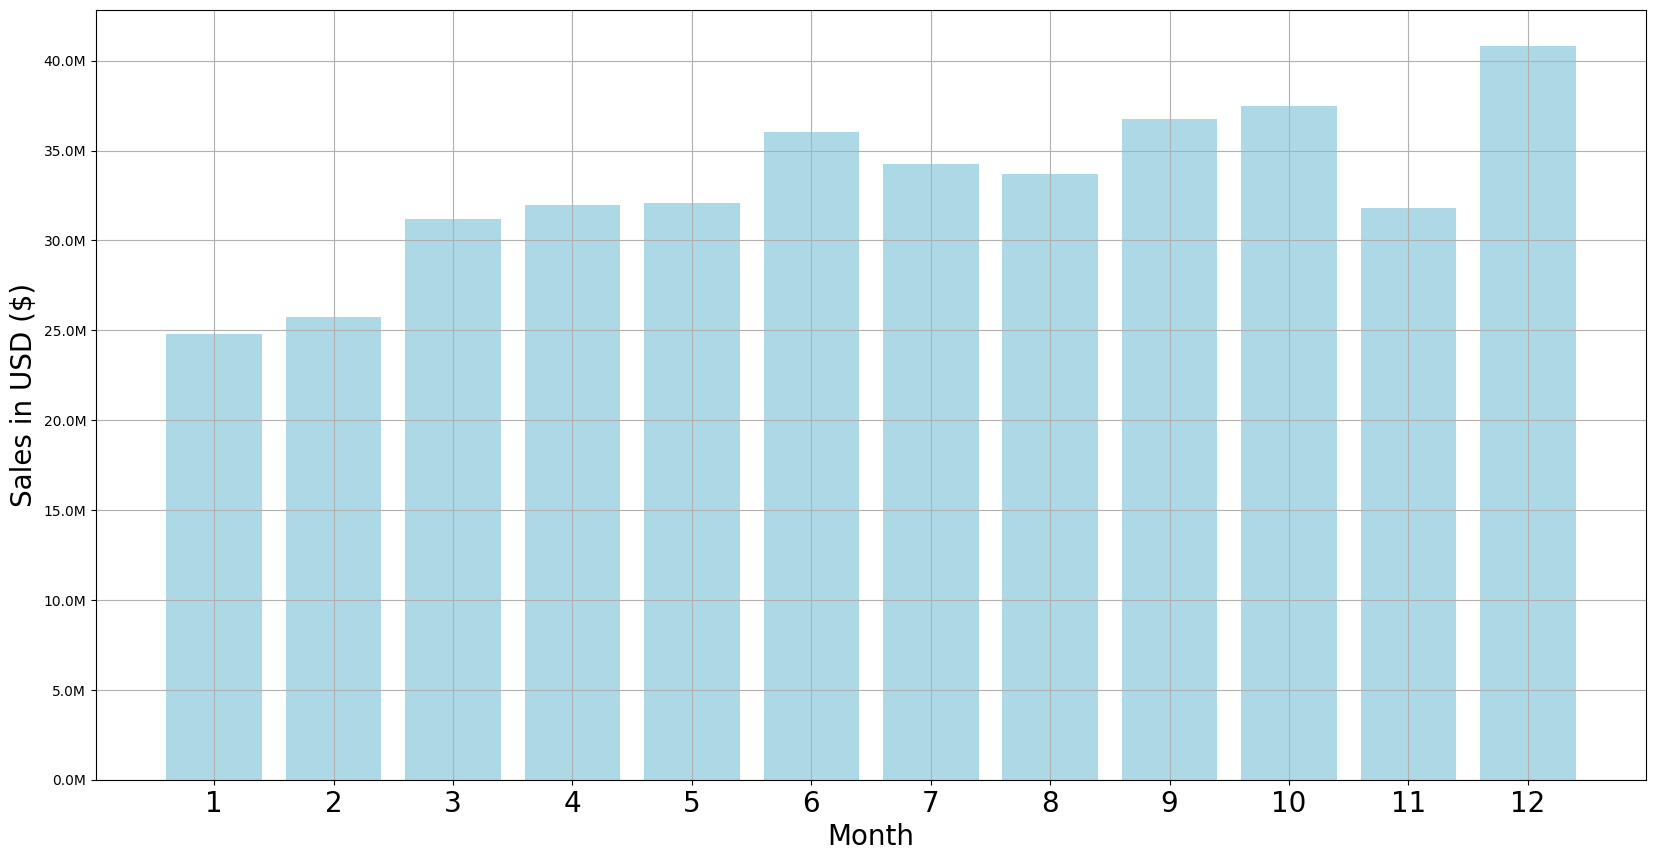

In [23]:
from matplotlib.ticker import FuncFormatter
from matplotlib.projections.geo import Formatter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

months = range (1,13)
months

def millions_formatter(x, pos):
  return f'{x/1e6:.1f}M'

plt.figure(figsize=(20,10))
plt.bar(months, month_sales['sale_dollars'], color='lightblue')
plt.xticks(months, size=20)
plt.ylabel('Sales in USD ($)', size = 20)
plt.xlabel('Month', size = 20)
plt.grid()

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
